In [21]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | taoudenni
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | antofagasta
Processing Record 13 of Set 1 | kissidougou
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | johor bahru
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Se

Processing Record 40 of Set 4 | chernyshevskiy
Processing Record 41 of Set 4 | cedar city
Processing Record 42 of Set 4 | bonaventure
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | wajima
Processing Record 45 of Set 4 | smithers
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | bandarbeyla
Processing Record 48 of Set 4 | liling
Processing Record 49 of Set 4 | sao cristovao
Processing Record 50 of Set 4 | buchanan
Processing Record 1 of Set 5 | balikpapan
Processing Record 2 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 3 of Set 5 | ixtapa
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | banmo
City not found. Skipping...
Processing Record 6 of Set 5 | cangzhou
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | stony plain
Processing Record 9 of Set 5 | nanortalik
Processing Record 10 of Set 5 | gainesville
Processing Record 11 of Set 5 | pangnirtung
Processin

City not found. Skipping...
Processing Record 29 of Set 8 | belaya gora
Processing Record 30 of Set 8 | tilichiki
Processing Record 31 of Set 8 | burns lake
Processing Record 32 of Set 8 | kenai
Processing Record 33 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 34 of Set 8 | carballo
Processing Record 35 of Set 8 | caldas da rainha
Processing Record 36 of Set 8 | aykhal
Processing Record 37 of Set 8 | shalya
Processing Record 38 of Set 8 | kalomo
City not found. Skipping...
Processing Record 39 of Set 8 | navolato
Processing Record 40 of Set 8 | mae ramat
Processing Record 41 of Set 8 | melfort
Processing Record 42 of Set 8 | oktyabrskoye
Processing Record 43 of Set 8 | maceio
Processing Record 44 of Set 8 | balugo
Processing Record 45 of Set 8 | acatlan
Processing Record 46 of Set 8 | deniliquin
Processing Record 47 of Set 8 | majene
Processing Record 48 of Set 8 | kathu
Processing Record 49 of Set 8 | ulaanbaatar
Processing Record 50 of Set 8 | karkaralinsk
City no

Processing Record 21 of Set 12 | arkhangelsk
Processing Record 22 of Set 12 | wynyard
Processing Record 23 of Set 12 | ginir
Processing Record 24 of Set 12 | kaya
Processing Record 25 of Set 12 | mineiros
Processing Record 26 of Set 12 | jalu
Processing Record 27 of Set 12 | dubove
Processing Record 28 of Set 12 | viligili
City not found. Skipping...
Processing Record 29 of Set 12 | warrington
Processing Record 30 of Set 12 | birkeland
Processing Record 31 of Set 12 | tavricheskoye
Processing Record 32 of Set 12 | ranong
Processing Record 33 of Set 12 | posse
Processing Record 34 of Set 12 | mrirt
City not found. Skipping...
Processing Record 35 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 36 of Set 12 | tres arroyos
Processing Record 37 of Set 12 | tynda
Processing Record 38 of Set 12 | diffa
Processing Record 39 of Set 12 | zabaykalsk
Processing Record 40 of Set 12 | asmara
Processing Record 41 of Set 12 | la paz
Processing Record 42 of Set 12 | port lincoln
Proc

In [6]:
len(city_data)

588

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,70.00,56,1,10.29,US,2020-08-18 23:08:25
1,Ribeira Grande,38.52,-28.70,73.08,91,54,23.06,PT,2020-08-18 23:08:54
2,Rikitea,-23.12,-134.97,71.96,79,0,10.29,PF,2020-08-18 23:07:16
3,Taoudenni,22.68,-3.98,101.86,24,2,17.72,ML,2020-08-18 23:08:54
4,Georgetown,5.41,100.34,80.60,94,20,2.24,MY,2020-08-18 23:06:25
5,Mataura,-46.19,168.86,50.14,74,100,5.59,NZ,2020-08-18 23:08:55
6,Bethel,41.37,-73.41,80.60,39,1,6.93,US,2020-08-18 23:08:55
7,Hilo,19.73,-155.09,82.40,65,90,7.11,US,2020-08-18 23:08:55
8,Vaini,-21.20,-175.20,73.40,94,90,11.41,TO,2020-08-18 23:08:56
9,Carnarvon,-24.87,113.63,55.40,87,22,10.29,AU,2020-08-18 23:08:56


In [8]:
new_col_ord = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_col_ord]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-08-18 23:08:25,42.10,-79.24,70.00,56,1,10.29
1,Ribeira Grande,PT,2020-08-18 23:08:54,38.52,-28.70,73.08,91,54,23.06
2,Rikitea,PF,2020-08-18 23:07:16,-23.12,-134.97,71.96,79,0,10.29
3,Taoudenni,ML,2020-08-18 23:08:54,22.68,-3.98,101.86,24,2,17.72
4,Georgetown,MY,2020-08-18 23:06:25,5.41,100.34,80.60,94,20,2.24
...,...,...,...,...,...,...,...,...,...
583,Portland,US,2020-08-18 23:09:38,45.52,-122.68,87.01,44,20,8.05
584,Ouallam,NE,2020-08-18 23:11:06,14.32,2.09,84.81,49,80,14.58
585,Bella Union,UY,2020-08-18 23:11:06,-30.28,-57.60,56.37,75,0,6.51
586,Puerto Penasco,MX,2020-08-18 23:06:37,31.32,-113.53,90.00,73,0,8.01


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597792267.5323656

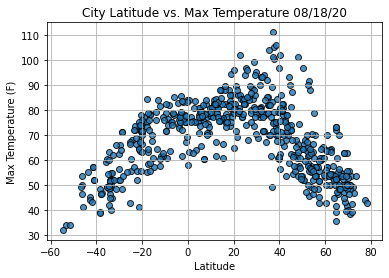

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

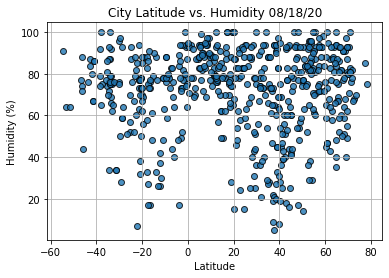

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

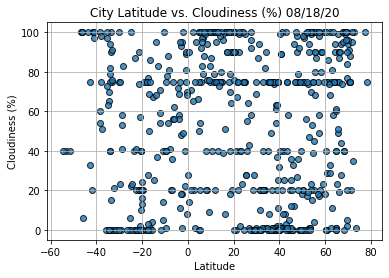

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

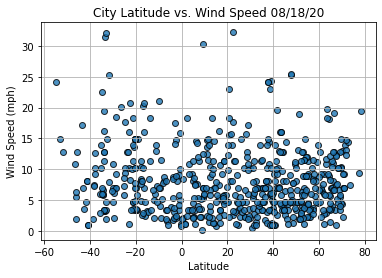

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-08-18 23:08:25,42.10,-79.24,70.00,56,1,10.29
1,Ribeira Grande,PT,2020-08-18 23:08:54,38.52,-28.70,73.08,91,54,23.06
3,Taoudenni,ML,2020-08-18 23:08:54,22.68,-3.98,101.86,24,2,17.72
4,Georgetown,MY,2020-08-18 23:06:25,5.41,100.34,80.60,94,20,2.24
6,Bethel,US,2020-08-18 23:08:55,41.37,-73.41,80.60,39,1,6.93
7,Hilo,US,2020-08-18 23:08:55,19.73,-155.09,82.40,65,90,7.11
11,Kissidougou,GN,2020-08-18 23:08:56,9.18,-10.10,70.59,97,9,5.41
12,Nikolskoye,RU,2020-08-18 23:08:56,59.70,30.79,53.01,76,18,4.47
14,Johor Bahru,MY,2020-08-18 23:05:42,1.47,103.76,77.00,94,71,1.12
15,Albany,US,2020-08-18 23:08:57,42.60,-73.97,75.99,51,8,7.16


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

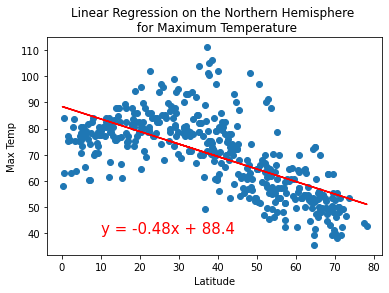

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

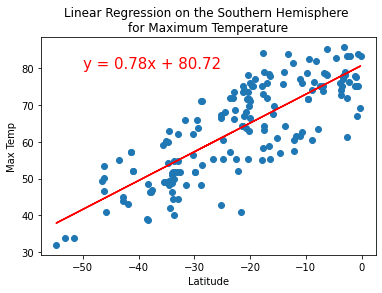

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, \
                       'Linear Regression on the Southern Hemisphere \n' + \
                        'for Maximum Temperature', 'Max Temp',(-50,80))

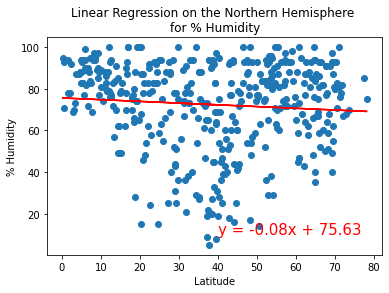

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, \
                       'Linear Regression on the Northern Hemisphere \n' + \
                        'for % Humidity', '% Humidity',(40,10))

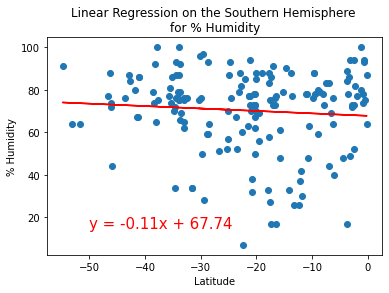

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, \
                       'Linear Regression on the Southern Hemisphere \n' + \
                        'for % Humidity', '% Humidity',(-50,15))

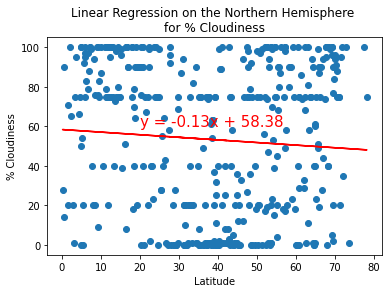

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, \
                       'Linear Regression on the Northern Hemisphere \n' + \
                        'for % Cloudiness', '% Cloudiness',(20,60))

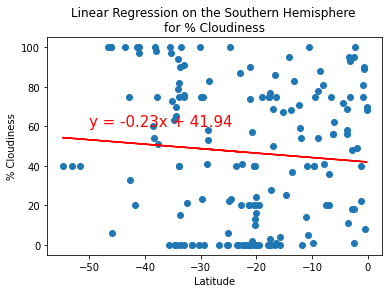

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, \
                       'Linear Regression on the Southern Hemisphere \n' + \
                        'for % Cloudiness', '% Cloudiness',(-50,60))

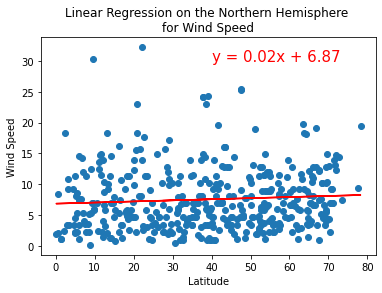

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, \
                       'Linear Regression on the Northern Hemisphere \n' + \
                        'for Wind Speed', 'Wind Speed',(40,30))

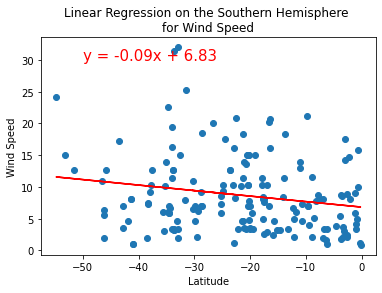

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, \
                       'Linear Regression on the Southern Hemisphere \n' + \
                        'for Wind Speed', 'Wind Speed',(-50,30))